In [20]:
from user_space_generators import generate_aligned_user_space_mixed
from network_generators import SEQ_GENERATOR
import seaborn as sns
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt


EXAMPLE = generate_aligned_user_space_mixed(100,0,3,0,0.03)
POL = SEQ_GENERATOR(EXAMPLE)
POL.calculate_similarity(method= 'euc')
POL.accept_deg_dist(np.random.randint(low = 1, high = 10, size = POL.user_space.shape[0]))
graph = POL.connect_sequential(HPOW= 100)


Casting Votes...: 100%|██████████| 100/100 [00:00<00:00, 16769.84it/s]


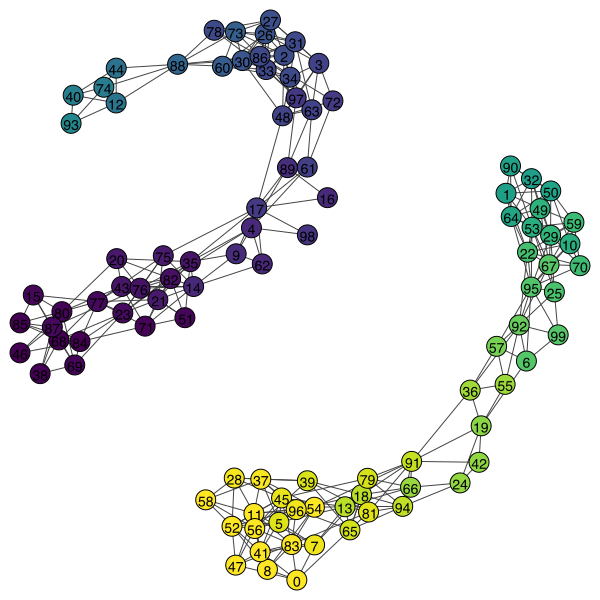

In [21]:
POL.PLOT(1)
ig.plot(POL.network, vertex_color = POL.network.vs["color"])